<a href="https://colab.research.google.com/github/JenBanks8585/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/Jen_Banks_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
from scipy.stats import ttest_ind,ttest_1samp,chi2,chi2_contingency
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns


#Confidence Intervals:

1. Generate and numerically represent a confidence interval on ONE attribute

In [0]:
# Preparing column headers for dataframe

column_headers= ['party',
                   'handicapped-infants', 'water-project-cost-sharing',
                   'adoption-of-the-budget-resolution',
                   'physician-fee-freeze',
                   'el-salvador-aid',
                   'religious-groups-in-schools',
                   'anti-satellite-test-ban',
                   'aid-to-nicaraguan-contras',
                   'mx-missile',
                   'immigration',
                   'synfuels-corporation-cutback',
                   'education-spending',
                   'superfund-right-to-sue',
                   'crime','duty-free-exports',
                   'export-administration-act-south-africa']

In [3]:
#Reading data

df_vot=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None, names= column_headers, na_values= '?')
print(df_vot.shape)
df_vot.head(2)

(435, 17)


,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN


In [4]:
#recode data as numeric

df_vot=df_vot.replace({'y':1, 'n':0})
print(df_vot.shape)
df_vot.head(2)

(435, 17)


,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN


In [5]:
#reviewing the number of representatives in each party

df_vot['party'].value_counts()

democrat      267
republican    168
Name: party, dtype: int64

In [6]:
#Creating a new dataframe for republicans
#Also checking a particular republican attribute(crime)

rep=df_vot[df_vot['party']=='republican'].dropna()
print(len(rep))
rep['immigration'].head()

108


8     0.0
28    0.0
30    0.0
33    0.0
35    0.0
Name: immigration, dtype: float64

In [0]:
# Defining the function that will calculate
#   a. standard error 
#   b. margin of error
#   c. confindence interval

def confidence_interval(data, confidence =0.95):
  data_array= np.array(data)                          # converting data to array
  mean= np.mean(data)                                 # mean/x_bar
  n=len(data)                                         # number count 
  stderr= np.std(data_array,ddof=1)/np.sqrt(n)        # standadr error
  moe=stderr*st.t.ppf(((1-confidence)/2),n-1)         # margin of error
  return( mean, mean - moe, mean + moe)               # mean, lower bound, upper bound


In [8]:
#generating the mean, lower and upper bounds
CI=confidence_interval(rep['immigration'])
CI

(0.5740740740740741, 0.6688388111692045, 0.4793093369789436)

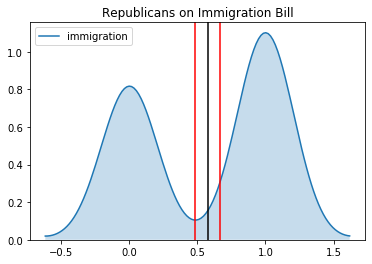

In [9]:
#Plotting using sns kernel density

def plot_confidence_interval(data, confidence= 0.95):
  sns.kdeplot(rep['immigration'], shade=True)
  plt.axvline(x=CI[1], color='red')
  plt.axvline(x=CI[2], color='red')
  plt.axvline(x=CI[0], color='k')

  plt.title('Republicans on Immigration Bill')
  plt.show()

plot_confidence_interval(rep['immigration'], confidence=0.95)

In [48]:
# 95% confidence interval, determining t-statistic

confidence= 0.95
n=len(rep['immigration']) 
mean= np.mean(rep['immigration'])
stderr= np.std(rep['immigration'],ddof=1)/np.sqrt(n)
moe=stderr*st.t.ppf(((1-confidence)/2),n-1)


t_stat =st.t.ppf(.975, dof)
print("t Statistic:", t_stat)
CI = (mean-moe, mean+ moe)
print("Confidence Interval", CI)

t Statistic: 2.1199052992210112
Confidence Interval (0.6688388111692045, 0.4793093369789436)


If a large number of samples is carried out, the means of these samples
will fall within the confidence interval 95% of the time.

In [50]:
#Running a 1-sample T-test for a value just outside the confidence interval

ttest_1samp(rep['immigration'], .47)

Ttest_1sampResult(statistic=2.177125374159849, pvalue=0.031668571472193145)

In [51]:
#Running a 1-sample T-test for a value just inside the confidence interval

ttest_1samp(rep['immigration'], .48)

Ttest_1sampResult(statistic=1.9679353915893294, pvalue=0.05166302284118054)

#Chi-squared tests:

A. Running Chi Squared Test with Numpy

In [10]:
# Using the Forest Data

df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [0]:
# Working of dependence/independence between FFMC and ISI
# Defining the variables


***Fine Fuel Moisture Code***
The Fine Fuel Moisture Code (FFMC) is a numeric rating of the moisture content of litter and other cured fine fuels. This code is an indicator of the relative ease of ignition and the flammability of fine fuel.

***Initial Spread Index***
The Initial Spread Index (ISI) is a numeric rating of the expected rate of fire spread. It combines the effects of wind and the FFMC on rate of spread without the influence of variable quantities of fuel.

***Drought Code***
The Drought Code (DC) is a numeric rating of the average moisture content of deep, compact organic layers. This code is a useful indicator of seasonal drought effects on forest fuels and the amount of smoldering in deep duff layers and large logs.

source: https://cwfis.cfs.nrcan.gc.ca/background/summary/fwi

In [11]:
# Converting Drought Code (DC) into categorical 

cut_point_DC=(0,200,400, 600, 800, 1000)
DC_labels= ['<200', '200-400', '400-600', '600-800', '>800']
df['DC_categories']= pd.cut(df['DC'],cut_point_DC, labels=DC_labels)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,DC_categories
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,<200
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,600-800
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,600-800
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,<200
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,<200


In [12]:
#Checking counts for each category

df['DC_categories'].value_counts()

600-800    310
<200        89
400-600     62
200-400     32
>800        24
Name: DC_categories, dtype: int64

In [13]:
# Converting Initial Spread Index (ISI) into categorical 

cut_point_ISI=(0,5,10, 15, 20, 100)
ISI_labels= ['0-5', '5-10', '10-15', '15-20', '20+']
df['ISI_categories']= pd.cut(df['ISI'],cut_point_ISI, labels=ISI_labels)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,DC_categories,ISI_categories
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,<200,5-10
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,600-800,5-10
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,600-800,5-10
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,<200,5-10
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,<200,5-10


In [14]:
#Checking counts for each category 

df['ISI_categories'].value_counts()

5-10     292
10-15    112
0-5       69
15-20     35
20+        8
Name: ISI_categories, dtype: int64

In [16]:
# Creating a cross tabulation between DC and ISI

DC_ISI_crosstab= pd.crosstab(df['DC_categories'], df['ISI_categories'], margins = True)
DC_ISI_crosstab

ISI_categories,0-5,5-10,10-15,15-20,20+,All
DC_categories,,,,,,
<200,39,41,7,0,1,88
200-400,12,14,4,2,0,32
400-600,0,24,29,4,5,62
600-800,17,193,69,29,2,310
>800,1,20,3,0,0,24
All,69,292,112,35,8,516


In [17]:
# Creating a cross tabulation between DC and ISI, without margins

DC_ISI_crosstab_no_margin= pd.crosstab(df['DC_categories'], df['ISI_categories'])
DC_ISI_crosstab_no_margin

ISI_categories,0-5,5-10,10-15,15-20,20+
DC_categories,,,,,
<200,39,41,7,0,1
200-400,12,14,4,2,0
400-600,0,24,29,4,5
600-800,17,193,69,29,2
>800,1,20,3,0,0


In [18]:
#Grabbing row counts

DC_200count= DC_ISI_crosstab.iloc[0][0:5].values
DC_200_400count= DC_ISI_crosstab.iloc[1][0:5].values
DC_400_600count= DC_ISI_crosstab.iloc[2][0:5].values
DC_600_800count= DC_ISI_crosstab.iloc[3][0:5].values
DC_800count= DC_ISI_crosstab.iloc[4][0:5].values
print(DC_200count)
print(DC_200_400count)
print(DC_400_600count)
print(DC_600_800count)
print(DC_800count)

[39 41  7  0  1]
[12 14  4  2  0]
[ 0 24 29  4  5]
[ 17 193  69  29   2]
[ 1 20  3  0  0]


Text(0, 0.5, 'Initial Spread Index (ISI)')

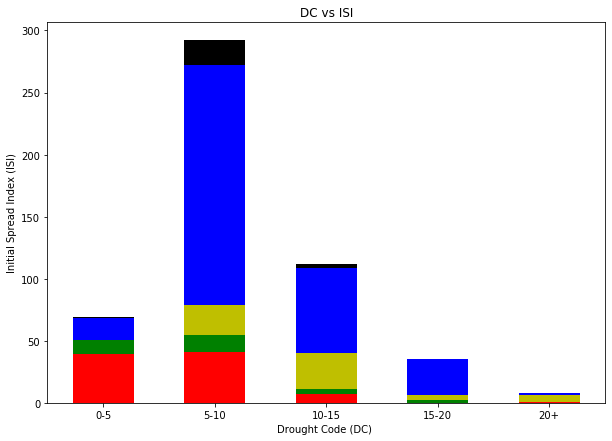

In [19]:
#Plotting bar charts for indices

plt.figure(figsize=(10,7))

p1= plt.bar(ISI_labels, DC_200count, 0.55, color='r')
p2= plt.bar(ISI_labels, DC_200_400count, 0.55, color='g', bottom = DC_200count)
p3= plt.bar(ISI_labels, DC_400_600count, 0.55, color='y',bottom = DC_200count+ DC_200_400count)
p4= plt.bar(ISI_labels, DC_600_800count, 0.55, color='b',bottom = DC_200count+DC_200_400count+DC_400_600count)
p5= plt.bar(ISI_labels, DC_800count, 0.55, color='k',bottom = DC_200count+DC_200_400count+DC_400_600count+DC_600_800count)

plt.title( 'DC vs ISI')
plt.xlabel('Drought Code (DC) ')
plt.ylabel('Initial Spread Index (ISI)')



In [20]:
#Grabbing row sums, column sums, total  
row_sum= DC_ISI_crosstab.iloc[0:5,5 ].values
column_sum= DC_ISI_crosstab.iloc[5,0:5 ].values
total= DC_ISI_crosstab.loc['All','All' ]

print(row_sum)
print(column_sum)
print (total)

[ 88  32  62 310  24]
[ 69 292 112  35   8]
516


In [22]:
#Creating an expected value table

expected=[]
for i in range(len(row_sum)):
  expected_row=[]
  for column in column_sum:
    expected_val=column*row_sum[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected=np.array(expected)

print(expected.shape)
print('  ')
print('Expected Values')
print(expected)
  



(5, 5)
  
Expected Values
[[ 11.76744186  49.79844961  19.10077519   5.96899225   1.36434109]
 [  4.27906977  18.10852713   6.94573643   2.17054264   0.49612403]
 [  8.29069767  35.08527132  13.45736434   4.20542636   0.96124031]
 [ 41.45348837 175.42635659  67.28682171  21.02713178   4.80620155]
 [  3.20930233  13.58139535   5.20930233   1.62790698   0.37209302]]


In [23]:
#Converting dataframe to array values for observed data

observed= DC_ISI_crosstab_no_margin.values
observed

array([[ 39,  41,   7,   0,   1],
       [ 12,  14,   4,   2,   0],
       [  0,  24,  29,   4,   5],
       [ 17, 193,  69,  29,   2],
       [  1,  20,   3,   0,   0]])

In [24]:
# Using numpy array broadcasting to calculate Chi- squared statistic
chi_squared_stat= ((observed - expected)**2/(expected)).sum()
chi_squared_stat

170.0371321400522

In [25]:
#Degrees of Freedom
dof= (len(row_sum)-1)*(len(column_sum)-1)
dof

16

B. Running Chi Squared Test with Scipy

In [26]:
#Running a chi squared test

chi2_contingency(observed)

(170.0371321400522,
 8.277549776855048e-28,
 16,
 array([[ 11.76744186,  49.79844961,  19.10077519,   5.96899225,
           1.36434109],
        [  4.27906977,  18.10852713,   6.94573643,   2.17054264,
           0.49612403],
        [  8.29069767,  35.08527132,  13.45736434,   4.20542636,
           0.96124031],
        [ 41.45348837, 175.42635659,  67.28682171,  21.02713178,
           4.80620155],
        [  3.20930233,  13.58139535,   5.20930233,   1.62790698,
           0.37209302]]))

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

3. Generate and numerically represent a confidence interval on All attributes for Republican votes

In [0]:
#Creating a list of columns excluding `party`

new_df=list(df_vot.columns.drop('party'))


In [61]:
# Creating a for loop that goes through all the columns to calculate CI

for col in new_df:
  def confidence_interval(data, confidence =0.95):
    data_array= np.array(data)                          
    mean= np.mean(data)                                 
    n=len(data)                                          
    stderr= np.std(data_array,ddof=1)/np.sqrt(n)        
    moe=stderr*st.t.ppf(((1+confidence)/2),n-1)          
    return(mean -moe, mean, mean + moe)                
  print('Confidence Interval for:', col, confidence_interval(rep[col]))

Confidence Interval for: handicapped-infants (0.13450349074958223, 0.21296296296296297, 0.2914224351763437)
Confidence Interval for: water-project-cost-sharing (0.3765480931771919, 0.4722222222222222, 0.5678963512672525)
Confidence Interval for: adoption-of-the-budget-resolution (0.08761355698812177, 0.1574074074074074, 0.22720125782669304)
Confidence Interval for: physician-fee-freeze (0.9723853391655276, 0.9907407407407407, 1.009096142315954)
Confidence Interval for: el-salvador-aid (0.913434261310743, 0.9537037037037037, 0.9939731460966644)
Confidence Interval for: religious-groups-in-schools (0.8059979340740583, 0.8703703703703703, 0.9347428066666824)
Confidence Interval for: anti-satellite-test-ban (0.18358393802160433, 0.26851851851851855, 0.35345309901543276)
Confidence Interval for: aid-to-nicaraguan-contras (0.08006715123831286, 0.14814814814814814, 0.2162291450579834)
Confidence Interval for: mx-missile (0.07261245914426012, 0.1388888888888889, 0.20516531863351767)
Confidence

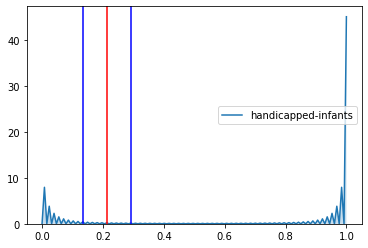

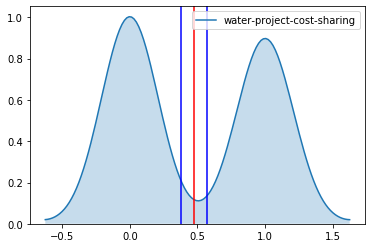

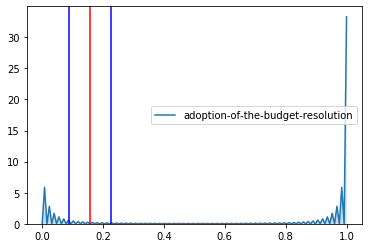

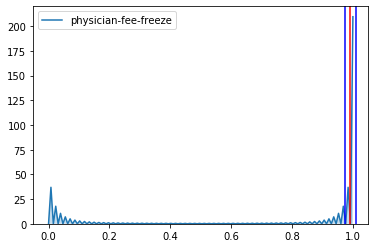

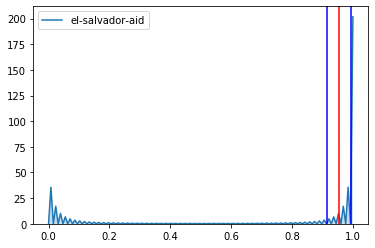

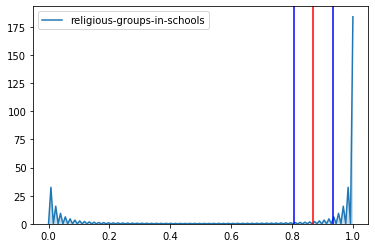

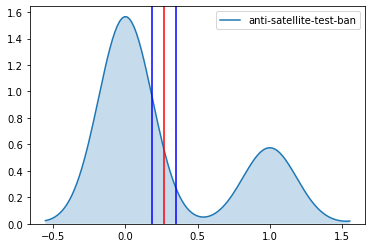

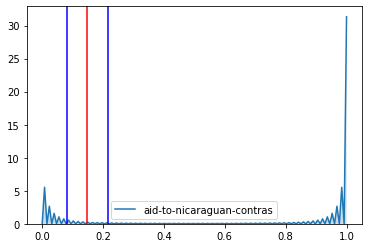

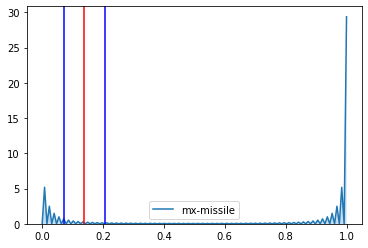

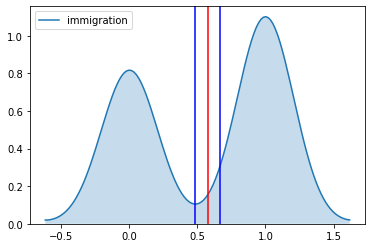

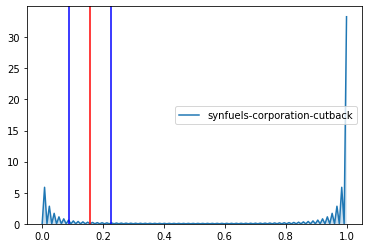

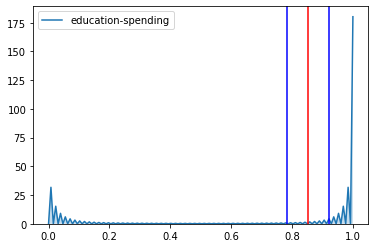

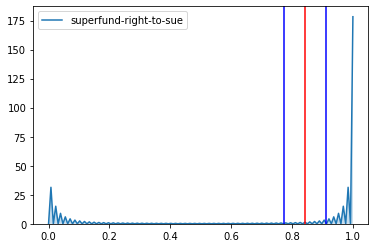

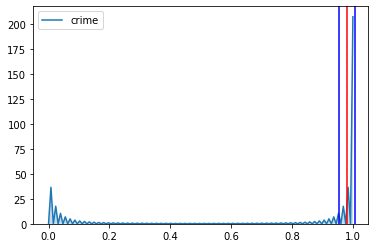

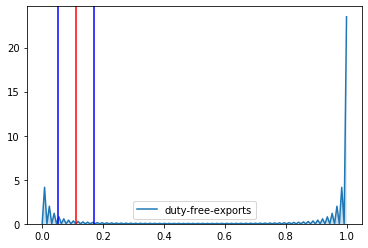

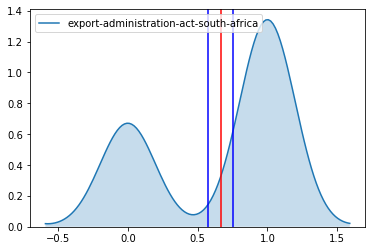

In [62]:
for col in new_df:
  def plot_confidence_interval(data, confidence= 0.95):
    sns.kdeplot(rep[col], shade=True)
    plt.axvline(x=confidence_interval(rep[col])[0], color='b')
    plt.axvline(x=confidence_interval(rep[col])[1], color='r')
    plt.axvline(x=confidence_interval(rep[col])[2], color='b')
    plt.title('')
    plt.show()

  plot_confidence_interval((rep[col]), confidence=0.95)

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)